In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('C:/Users/harsh/Desktop/Data Science/Indian Food 101/indian_food.csv')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


# Notes

### Potential Questions that can be answered 
- Proportions of Veg to Non veg dishes
- Number of dishes that come from each region 
- What sort of flavour profiles are there 
- What is the most popular flavour profile of each region 
- What is the most popular flavour profile in each state  
- Average Preparation Time 
- Average Cooking Time 
- What types of course of meal are there 
- What sort of ingredients are used in indian cooking 
- What foods have the shortest and longest cooking time 
- What foods have the shortest and longest preparation time
- What is the average cooking time for each region and state
- What is the average preparation time for each region and state 
- Average main course cooking time 
- Average snack cooking time 
- Average cooking time for main courses in each state and region 
- Average preparation time for snacks in each state and region 
- Longest and shortest preparation times for main courses
- Longest and shortest preparation times for snacks
- Infographs on each region

#### References
- https://www.kaggle.com/nehaprabhavalkar/indian-cuisine-analysis
- https://www.kaggle.com/mysarahmadbhat/eda-on-indian-food

# Light data analysis 

We do this in order to understand the general idea of what the data looks like before we start going into detail analysis and understanding the different aspects and answering questions that I have asked above which can be answered by the following dataset

In [3]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [5]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [6]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [7]:
v1 = df.fillna("Unknown")

In [8]:
v1.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

In [9]:
v2 = v1.set_index('name')
v2

,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
name,,,,,,,,
Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...
Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North


In [10]:
q=df.replace(-1,np.nan)
w=df.replace('-1',np.nan)
q

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5.0,30.0,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20.0,60.0,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,NaN,NaN,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20.0,45.0,sweet,dessert,Madhya Pradesh,Central


## Flavour Profiles

All the different types of potential flavour profiles that exist within the Indian palatte

In [11]:
v2.flavor_profile.unique()

array(['sweet', 'spicy', 'bitter', '-1', 'sour'], dtype=object)

#### The amount of foods placed according to their flavour profile category and the origin of the dish statewise

In [12]:
state_flavor_profile = v2.groupby(['flavor_profile', 'state']).size()

In [13]:
state_flavor_profile

flavor_profile  state          
-1              -1                  4
                Assam               4
                Gujarat             3
                Karnataka           1
                Kerala              3
                Maharashtra         4
                Manipur             1
                Odisha              1
                Punjab              2
                Tamil Nadu          4
                West Bengal         2
bitter          Gujarat             2
                Punjab              2
sour            Gujarat             1
spicy           -1                 14
                Andhra Pradesh      2
                Assam              11
                Bihar               2
                Chhattisgarh        1
                Goa                 1
                Gujarat            23
                Haryana             1
                Jammu & Kashmir     1
                Karnataka           2
                Kerala              4
                Ma

In [14]:
region_flavor_profile = v2.groupby(["flavor_profile", 'region']).size()

In [15]:
region_flavor_profile

flavor_profile  region    
-1              -1             2
                East           3
                North          2
                North East     5
                South         10
                West           7
bitter          North          2
                West           2
sour            West           1
spicy           -1             6
                Central        2
                East           6
                North         35
                North East    13
                South         30
                West          41
sweet           -1             5
                Central        1
                East          22
                North         10
                North East     7
                South         19
                Unknown        1
                West          23
dtype: int64

#### Most popular foods according to their flavour profile as well as theor region and state

#### Flavour 

#### Dishes with highest prep and cook time of each flavour profile of each region

In [16]:
v1.groupby(['flavor_profile', 'region']).max()

name  \
flavor_profile region                           
-1             -1                    Red Rice   
               East                   Pakhala   
               North                    Rongi   
               North East          Pani Pitha   
               South                  Theeyal   
               West                    Kansar   
bitter         North            Karela bharta   
               West                   Muthiya   
sour           West               Keri no ras   
spicy          -1                        Upma   
               Central                 Laapsi   
               East                    Shukto   
               North       Vegetable jalfrezi   
               North East         Pork Bharta   
               South                     Vada   
               West                     Zunka   
sweet          -1                   Nankhatai   
               Central              Mawa Bati   
               East                   Sandesh   
               North              Sohan halwa   
               North East           Til Pitha   
               South               Unni Appam   
               Unknown               Panjeeri   
               West                Sutar feni   

                                                                 ingredients  \
flavor_profile region                                                          
-1             -1          Red pepper, red onion, butter, watercress, oli...   
               East                                     Maida, vegetable oil   
               North                Whole wheat flour, honey, butter, garlic   
               North East  Tea leaves, white sesame seeds, dry coconut, s...   
               South       Yogurt, ginger, curry leaves, baking soda, gre...   
               West        Whole wheat flour, olive oil, hot water, all p...   
bitter         North           Potato, fenugreek leaves, chillies, salt, oil   
               West        Rava, gram flour, lemon juice, turmeric, fenug...   
sour           West                                             Mango, sugar   
spicy          -1               Urad dal, sev, lemon juice, chopped tomatoes   
               Central      Cinnamon, jaggery, clarified butter, dry roasted   
               East        Moong dal, garam masala powder, garlic, green ...   
               North        Whole wheat flour, chickpea flour, green chilies   
               North East    Ridge gourd, fish, lemon, tomatoes, mustard oil   
               South       Whole wheat flour, arhar dal, ginger, kala jee...   
               West        Yogurt, fresh coconut, sesame seeds, semolina,...   
sweet          -1          Rose syrup, falooda sev, mixed nuts, saffron, ...   
               Central     Milk powder, dry fruits, arrowroot powder, all...   
               East                                     Sugar, chenna cheese   
               North                               Yogurt, milk, nuts, sugar   
               North East      Sticky rice, rice flour, jaggery, orange rind   
               South                                      Wheat flour, sugar   
               Unknown     Whole wheat flour, musk melon seeds, poppy see...   
               West        Whole wheat rava, chia seed, lemon, edible gum...   

                                 diet  prep_time  cook_time       course  \
flavor_profile region                                                      
-1             -1          vegetarian         15         25  main course   
               East        vegetarian         20         30  main course   
               North       vegetarian         60         30  main course   
               North East  vegetarian         10         20  main course   
               South       vegetarian        495         60        snack   
               West        vegetarian         30         40        snack   
bitter         North       vegetarian         20         50  main course   
 

#### Dishes with highest prep and cook time of each flavour profile of each state

In [17]:
v1.groupby(['flavor_profile', 'state']).max()

name  \
flavor_profile state                                 
-1             -1                            Sevai   
               Assam                    Pani Pitha   
               Gujarat                      Kansar   
               Karnataka                   Sandige   
               Kerala                      Theeyal   
               Maharashtra                Dalithoy   
               Manipur                  Black rice   
               Odisha                      Pakhala   
               Punjab                        Rongi   
               Tamil Nadu             Thayir sadam   
               West Bengal                   Luchi   
bitter         Gujarat                     Muthiya   
               Punjab                Karela bharta   
sour           Gujarat                 Keri no ras   
spicy          -1                             Vada   
               Andhra Pradesh            Pesarattu   
               Assam                   Masor tenga   
               Bihar                 Sattu ki roti   
               Chhattisgarh                   Fara   
               Goa                        Vindaloo   
               Gujarat                     Undhiyu   
               Haryana                Kadhi pakoda   
               Jammu & Kashmir            Dum aloo   
               Karnataka                 Koshambri   
               Kerala                   Paravannam   
               Madhya Pradesh               Laapsi   
               Maharashtra                   Zunka   
               NCT of Delhi         Butter chicken   
               Nagaland                      Galho   
               Punjab           Vegetable jalfrezi   
               Rajasthan                    Pattor   
               Tamil Nadu                  Poriyal   
               Telangana                   Biryani   
               Tripura                 Pork Bharta   
               Uttar Pradesh       Navrattan korma   
               West Bengal                  Shukto   
sweet          -1                          Payasam   
               Andhra Pradesh         Pootharekulu   
               Assam                     Til Pitha   
               Bihar                       Malapua   
               Goa                          Pinaca   
               Gujarat                   Mohanthal   
               Jammu & Kashmir              Shufta   
               Karnataka            Obbattu holige   
               Kerala              Kuzhi paniyaram   
               Madhya Pradesh            Mawa Bati   
               Maharashtra              Sutar feni   
               Manipur              Chak Hao Kheer   
               Odisha                     Rasabali   
               Punjab                        Lassi   
               Rajasthan                    Ghevar   
               Tamil Nadu               Unni Appam   
               Telangana               Sheer korma   
               Uttar Pradesh           Sohan halwa   
               Uttarakhand                 Singori   
               West Bengal                 Sandesh   

                                                                      ingredients  \
flavor_profile state                                                                
-1             -1                                  Sevai, parboiled rice, steamer   
               Assam            Tea leaves, white sesame seeds, dry coconut, s...   
               Gujarat                         Wheat flour, cashews, rapeseed oil   
               Karnataka        Thin rice flakes, black sesame seeds, curry le...   
               Kerala           Coconut, whole red beans, masala, sesame oil, ...   
               Maharashtra      Whole wheat flour, olive oil, hot water, all p...   
               Manipur          Forbidden black rice, chicken, olive oil, sliv...   
               Odisha                 Curd, cooked rice, curry leaves, dry chilli   
               Punjab                    Whole wheat flour, hon

## How many different ingredients are used in Indian cooking

Indian cooking is often characterized by its variert of ingredients that are put in together to make what we know as indian food, in this part I take into consideration the different ingredients that are used in making the food by making the indgredients provided into a list and then converting into a set of unique values.

In [18]:
ing_set = {''}
ingredients_seperated = v2['ingredients'].str.split(',', expand=True).stack().unique().tolist()
#ingredients_seperated
for i in ingredients_seperated:
    ing_set.add(i)
print("Number of ingredients present in Indian cooking: ", len(ing_set)-1, 'ingredients')


Number of ingredients present in Indian cooking:  426 ingredients


In [19]:
print("The unique variety of ingredients: ")
print(ing_set)

The unique variety of ingredients: 
{'', 'Cashews', 'Biryani masala', 'Peanuts', ' atta', ' jaggery ', ' cottage cheese', 'Brown rice', ' sugar', 'Coconut milk', ' rock salt', 'Mango', ' garam masala powder', ' chilli', 'Glutinous rice', ' cardamom powder', ' mixed vegetables', ' palak', ' baking soda', ' baking powder', ' white urad dal', ' dough', ' long beans', ' cardamom pods', ' musk melon seeds', 'Wheat flour', ' butter', ' green chilli', 'Basmati rice', 'Forbidden black rice', 'Baby corn', 'Green garlic chutney', ' filling', ' saffron', 'Chicken thighs', ' kala jeera', ' malai', 'Sugar', ' powdered sugar', ' sugar syrup', 'Amaranth leaves', ' urad dal', ' fish fillets', ' sev', 'Baby potatoes', 'Split urad dal', ' beans', 'Rice flakes', ' chana dal', ' green chillies', 'Chickpea flour', 'Whole wheat rava', ' dry roasted', ' chopped tomatoes', 'Naan bread', 'Cucumber', ' peanut', ' surti papdi', ' peanut oil', ' dates', 'Green chilies', 'Maida', ' masoor dal', ' mutton', 'Moong d

## Proportion of vegetarian dishes to non-vegetarian dishes

Vegetarianism is given a lot of importance and emphasis in the indian subcontinent, thus from the foods that are presented in the dataset, lets see the different proportions of veg dishes compared to non veg dishes

In [20]:
diet_count = v2.diet.value_counts()

<AxesSubplot:ylabel='diet'>

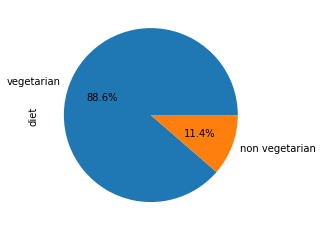

In [21]:
diet_count.plot.pie(autopct="%.1f%%")

## Number of dishes that come from each region and state 

### By State

In [22]:
state_val = v2.groupby('state').size()
x = state_val.rename(index={'-1': 'Unknown'})
x

state
Unknown            24
Andhra Pradesh     10
Assam              21
Bihar               3
Chhattisgarh        1
Goa                 3
Gujarat            35
Haryana             1
Jammu & Kashmir     2
Karnataka           6
Kerala              8
Madhya Pradesh      2
Maharashtra        30
Manipur             2
NCT of Delhi        1
Nagaland            1
Odisha              7
Punjab             32
Rajasthan           6
Tamil Nadu         20
Telangana           5
Tripura             1
Uttar Pradesh       9
Uttarakhand         1
West Bengal        24
dtype: int64

<AxesSubplot:ylabel='state'>

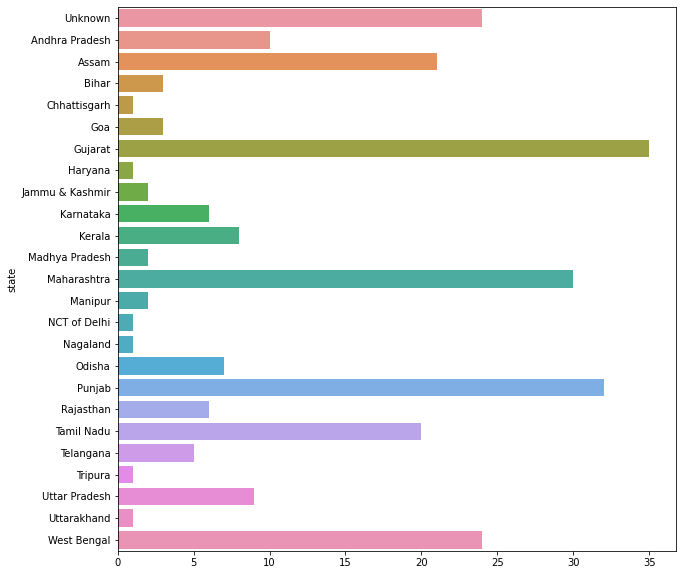

In [23]:
plt.figure(figsize=(10,10))
sns.barplot(y=x.index, x=x.values)

### By Region

In [24]:
region_val = v2.groupby('region').size()
b = region_val.rename(index={'-1': 'Unknown'})
b

region
Unknown       13
Central        3
East          31
North         49
North East    25
South         59
Unknown        1
West          74
dtype: int64

<AxesSubplot:ylabel='region'>

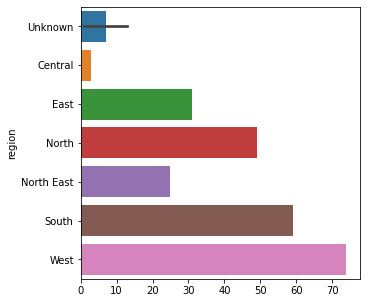

In [25]:
plt.figure(figsize=(5,5))
sns.barplot(y=b.index, x=b.values)

##  Cooking and Preparation times 

### Average cooking and preparation times

In [26]:
v2.mean()

prep_time    31.105882
cook_time    34.529412
dtype: float64

### Average cooking and preparation time per state

In [27]:
avg_c_and_p_time_state = v1.groupby("state").mean().reset_index()

In [28]:
avg_c_and_p_time_state['total_avg_time'] = avg_c_and_p_time_state['prep_time'] + avg_c_and_p_time_state['cook_time']
avg_c_and_p_time_state

,state,prep_time,cook_time,total_avg_time
0,-1,63.083333,35.041667,98.125000
1,Andhra Pradesh,61.000000,37.500000,98.500000
2,Assam,5.714286,14.285714,20.000000
3,Bihar,21.666667,66.666667,88.333333
4,Chhattisgarh,10.000000,60.000000,70.000000
5,Goa,9.666667,33.000000,42.666667
6,Gujarat,13.742857,26.485714,40.228571
7,Haryana,10.000000,60.000000,70.000000
8,Jammu & Kashmir,9.500000,24.500000,34.000000
9,Karnataka,60.833333,44.166667,105.000000


### Average cooking and preparation  time per region

In [29]:
avg_c_and_p_time_region = v1.groupby("region").mean().reset_index()

In [30]:
avg_c_and_p_time_region['total_avg_time'] = avg_c_and_p_time_region['prep_time'] + avg_c_and_p_time_region['cook_time']
avg_c_and_p_time_region

,region,prep_time,cook_time,total_avg_time
0,-1,16.846154,21.230769,38.076923
1,Central,13.333333,48.333333,61.666667
2,East,37.774194,37.483871,75.258065
3,North,37.224490,41.102041,78.326531
4,North East,14.520000,14.320000,28.840000
5,South,54.169492,34.338983,88.508475
6,Unknown,10.000000,25.000000,35.000000
7,West,14.986486,37.824324,52.810811


#### Shortest Cooking time and preparation time 

In [31]:
shortest_cooking_times = q.sort_values(['cook_time'], ascending=True).iloc[:10, :]
shortest_cooking_times

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15.0,2.0,spicy,snack,-1,-1
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5.0,5.0,spicy,snack,-1,-1
11,Lassi,"Yogurt, milk, nuts, sugar",vegetarian,5.0,5.0,sweet,dessert,Punjab,North
147,Papadum,"Lentils, black pepper, vegetable oil",vegetarian,5.0,5.0,spicy,snack,Kerala,South
212,Lilva Kachori,"Green garlic chutney, fresh green peas, ginger...",vegetarian,30.0,6.0,spicy,snack,Gujarat,West
78,Chapati,"Whole wheat flour, olive oil, hot water, all p...",vegetarian,10.0,10.0,-1,main course,Maharashtra,West
169,Bajri no rotlo,"Wheat flour, pearl millet flour, hot water",vegetarian,10.0,10.0,spicy,main course,Gujarat,West
195,Koshimbir,"Cucumber, carrot, tomatoes, cilantro",vegetarian,10.0,10.0,spicy,main course,Maharashtra,West
207,Surnoli,"Rice flakes, yogurt, raw rice, jaggery, grated...",vegetarian,60.0,10.0,spicy,snack,Maharashtra,West
190,Keri no ras,"Mango, sugar",vegetarian,10.0,10.0,sour,main course,Gujarat,West


In [32]:
shortest_prep_times = q.sort_values(['prep_time'], ascending=True).iloc[:10, :]
shortest_prep_times

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
214,Khichu,"Rice flour, sesame seeds, baking soda, peanut oil",vegetarian,5.0,10.0,spicy,snack,Gujarat,West
38,Bandar laddu,"Besan, jaggery, cardamom powder, ghee, cashews...",vegetarian,5.0,35.0,sweet,dessert,Andhra Pradesh,South
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5.0,5.0,spicy,snack,-1,-1
70,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5.0,40.0,spicy,main course,Punjab,North
45,Mysore pak,"Besan flour, semolina, mung bean, jaggery, coc...",vegetarian,5.0,20.0,sweet,dessert,Karnataka,South
180,Dalithoy,"Arhar dal, coconut oil, curry leaves, mustard ...",vegetarian,5.0,20.0,-1,main course,Maharashtra,West
175,Chorafali,"Urad dal, bengal gram flour, dried mango, baki...",vegetarian,5.0,15.0,spicy,snack,Gujarat,West
49,Pongal,"Rice, jaggery, cashews, ghee",vegetarian,5.0,20.0,sweet,dessert,Tamil Nadu,South
197,Mohanthal,"Rose water, pistachio, badam, bengal gram flou...",vegetarian,5.0,45.0,sweet,dessert,Gujarat,West
143,Kuzhambu,"Pearl onions, urad dal, drumsticks, tomato, cu...",vegetarian,5.0,30.0,spicy,main course,Tamil Nadu,South


#### Longest Cooking and Preparation time 

In [33]:
longest_cooking_times = q.sort_values(['cook_time'], ascending=False).iloc[:10, :]
longest_cooking_times

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10.0,720.0,sweet,dessert,Maharashtra,West
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500.0,120.0,spicy,main course,Punjab,North
75,Biryani,"Chicken thighs, basmati rice, star anise, swee...",non vegetarian,30.0,120.0,spicy,main course,Telangana,South
27,Malapua,"Yoghurt, refined flour, ghee, fennel seeds",vegetarian,10.0,120.0,sweet,dessert,Bihar,North
115,Rajma chaval,"Red kidney beans, garam masala powder, ginger,...",vegetarian,15.0,90.0,spicy,main course,-1,North
83,Daal baati churma,"Moong dal, masoor dal, chana dal, wheat flour,...",vegetarian,10.0,90.0,spicy,main course,Rajasthan,West
130,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360.0,90.0,spicy,snack,-1,South
34,Rasgulla,"Chhena, sugar, cardamom",vegetarian,10.0,90.0,sweet,dessert,West Bengal,East
128,Dosa,"Chana dal, urad dal, whole urad dal, blend ric...",vegetarian,360.0,90.0,spicy,snack,-1,South
142,Kuzhakkattai,"Sesame oil, raw rice, jaggery, grated coconut",vegetarian,10.0,90.0,spicy,main course,Tamil Nadu,South


In [34]:
longest_prep_times = q.sort_values(['prep_time'], ascending=False).iloc[:10, :]
longest_prep_times

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500.0,120.0,spicy,main course,Punjab,North
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495.0,40.0,-1,main course,Kerala,South
29,Misti doi,"Milk, jaggery",vegetarian,480.0,30.0,sweet,dessert,West Bengal,East
130,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360.0,90.0,spicy,snack,-1,South
128,Dosa,"Chana dal, urad dal, whole urad dal, blend ric...",vegetarian,360.0,90.0,spicy,snack,-1,South
144,Masala Dosa,"Chana dal, urad dal, potatoes, idli rice, thic...",vegetarian,360.0,90.0,spicy,snack,-1,South
48,Poornalu,"Chana dal, jaggery",vegetarian,240.0,60.0,sweet,dessert,Andhra Pradesh,South
66,Chak Hao Kheer,"Rice, milk, sugar, cardamom",vegetarian,240.0,45.0,sweet,dessert,Manipur,North East
122,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, mari...",non vegetarian,240.0,30.0,spicy,main course,Punjab,North
123,Tandoori Fish Tikka,"Chickpea flour, biryani masala powder, yogurt,...",non vegetarian,240.0,30.0,spicy,starter,Punjab,North


## Types of meals that are there

#### Types of courses of meals

In [35]:
v1['course'].unique()

array(['dessert', 'main course', 'starter', 'snack'], dtype=object)

#### Amount of foods per course of meal

In [36]:
v1['course'].value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

#### Amount of courses of food per state per region

In [37]:
v1.groupby(['region', 'state', 'course']).size()

region      state            course     
-1          -1               dessert         5
                             main course     4
                             snack           4
Central     Chhattisgarh     snack           1
            Madhya Pradesh   dessert         1
                             main course     1
East        Odisha           dessert         6
                             main course     1
            West Bengal      dessert        15
                             main course     9
North       -1               main course     1
            Bihar            dessert         1
                             main course     2
            Haryana          main course     1
            Jammu & Kashmir  dessert         1
                             main course     1
            NCT of Delhi     main course     1
            Punjab           dessert         2
                             main course    28
                             starter         2
            Uttar P